In [2]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Kaggle Dataset

Dataset is from: https://www.kaggle.com/datasets/ziya07/basketball-player-performance?resource=download

In [3]:
data = pd.read_csv('basketball_training_dataset.csv')
df = pd.DataFrame(data)
print(df.head())

   heart_rate      speed  jump_height  endurance    strength  \
0         164   9.972111    39.837807  35.847729  120.063334   
1         167  12.104871    27.534825  20.772913  134.181574   
2         173   8.447687    39.322949  36.631025  106.666934   
3         120  11.399393    35.837591  29.158275   97.680136   
4         123  14.842466    33.513783  22.899903  112.188239   

   player_efficiency  training_effectiveness  
0          18.125450                       1  
1          29.261878                       1  
2          15.670276                       1  
3          15.261576                       1  
4          16.670148                       1  


## Create correlation matrix for metrics

See which physical metrics have the highest correlation with each other 

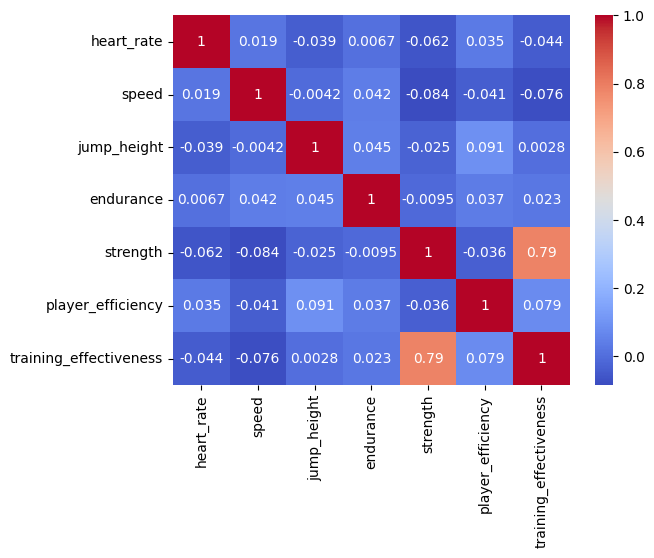

training_effectiveness  strength                  0.788125
strength                training_effectiveness    0.788125
player_efficiency       jump_height               0.091296
jump_height             player_efficiency         0.091296
speed                   strength                  0.083843
dtype: float64


In [12]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

#Extract the largest correlation values to see which physical stats have the highest correlation
correlation = correlation_matrix.unstack()
sorted_correlation = correlation.abs().sort_values(ascending = False)
filtered_correlation = sorted_correlation[sorted_correlation < 1] #filter out the ones where it's correlated w itself (aka 1)
top_correlations = filtered_correlation.head(5)
print(top_correlations) 

<i>Training effectiveness and strength have the highest correlation, being at approximately 0.79. Coming in second is player efficiency and jump height, at approximately 0.091. </i>

## Analyze areas of improvement

Compare a certain player to a higher performing player (based on player efficiency) to see which physical metric they need to improve in

In [10]:
#Compare a certain player to higher performing players (based on player_efficiency) to see which areas they are lacking compared to them

high_performer = df[df['player_efficiency'] > df['player_efficiency'].quantile(0.9)] #top 10% of performers in player efficieny
high_performer_avg = high_performer.mean() #take the average of all stats for high performers

X_test = df.drop('player_efficiency', axis=1) #assigning X_test manually
selected_player_stats = X_test.iloc[0] #specify player here

improvement_areas = high_performer_avg - selected_player_stats
print(improvement_areas.sort_values(ascending = False))

speed                      1.281998
training_effectiveness    -0.240000
jump_height               -9.534802
endurance                -10.640592
heart_rate               -12.060000
strength                 -19.870982
player_efficiency               NaN
dtype: float64


<i>Compared to the top players, player 0 struggles the most with their speed. Can also see that compared to the top players, they excel in terms of strength.</i>